<a href="https://colab.research.google.com/github/nehalmuthu/Covid-Simulation-in-Federated-Environment/blob/master/baselines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
import datetime
import numpy as np
from scipy.io import savemat
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error


In [41]:
df=pd.read_csv('/content/gdrive/MyDrive/FedLearningCovid/newideas/data/processed_US_data.csv')

In [42]:
st=df.sub_region_1.unique()
comp=[]
for i in st:
  m=(df[df['sub_region_1']==i].cases).mean()
  if m>1000 and m<1500:
    su=(df[df['sub_region_1']==i].cases).sum()
    print(i,su,m)
    comp.append(i)


Alabama 839947 1372.4624183006536
Colorado 793899 1280.4822580645161
Kentucky 768090 1240.8562197092083
Louisiana 765295 1242.362012987013
Massachusetts 879126 1375.7840375586854
Minnesota 847010 1368.3521809369952
Missouri 890463 1440.878640776699
Oklahoma 655511 1058.9838449111471
South Carolina 908837 1468.2342487883684
Washington 756733 1184.245696400626
Wisconsin 928389 1452.8779342723005


In [43]:

comp.remove('Missouri')
comp.remove('Massachusetts')
comp.remove('Oklahoma')
comp.remove('South Carolina')
comp.remove('Wisconsin')
comp.remove('Louisiana')


In [44]:

nam=comp.copy()
#  2021 april may june july
#dat=dat[dat['sub_region_1']==nam]
dat=df[df['sub_region_1'].isin(nam)].copy()


In [45]:
#5/1/2020 - 3/31/2021
dat=dat[dat['date']>='2020-04-01']
dat=dat[dat['date']<'2021-06-01']

dat=dat.reset_index()
dat=dat.drop('index',axis=1)




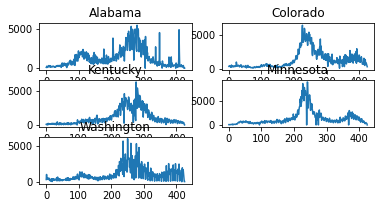

In [46]:
import matplotlib.pyplot as plt
for i in range(len(comp)):
  df=dat[dat["sub_region_1"]==comp[i]]
  plt.subplot(4,2,i+1)
  plt.title(comp[i])
  plt.plot(list(df.cases))

plt.savefig('foo.png')



In [47]:
dat

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,fips,cases,deaths
0,US,United States,Alabama,0,0.0,US-AL,0.0,ChIJdf5LHzR_hogR6czIUzU0VV4,2020-04-01,-25.0,5.0,19.0,-20.0,-39.0,14.0,1,109,28
1,US,United States,Alabama,0,0.0,US-AL,0.0,ChIJdf5LHzR_hogR6czIUzU0VV4,2020-04-02,-32.0,3.0,12.0,-25.0,-39.0,16.0,1,162,32
2,US,United States,Alabama,0,0.0,US-AL,0.0,ChIJdf5LHzR_hogR6czIUzU0VV4,2020-04-03,-29.0,12.0,17.0,-29.0,-40.0,16.0,1,265,38
3,US,United States,Alabama,0,0.0,US-AL,0.0,ChIJdf5LHzR_hogR6czIUzU0VV4,2020-04-04,-41.0,8.0,4.0,-33.0,-26.0,11.0,1,97,44
4,US,United States,Alabama,0,0.0,US-AL,0.0,ChIJdf5LHzR_hogR6czIUzU0VV4,2020-04-05,-50.0,-18.0,-1.0,-40.0,-36.0,12.0,1,208,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,US,United States,Washington,0,0.0,US-WA,0.0,ChIJ-bDD5__lhVQRuvNfbGh4QpQ,2021-05-27,-9.0,1.0,26.0,-32.0,-35.0,9.0,53,1526,5798
2126,US,United States,Washington,0,0.0,US-WA,0.0,ChIJ-bDD5__lhVQRuvNfbGh4QpQ,2021-05-28,-7.0,5.0,91.0,-25.0,-37.0,7.0,53,1061,5809
2127,US,United States,Washington,0,0.0,US-WA,0.0,ChIJ-bDD5__lhVQRuvNfbGh4QpQ,2021-05-29,-12.0,3.0,140.0,-10.0,-16.0,0.0,53,751,5809
2128,US,United States,Washington,0,0.0,US-WA,0.0,ChIJ-bDD5__lhVQRuvNfbGh4QpQ,2021-05-30,2.0,3.0,111.0,-12.0,-14.0,-1.0,53,0,5809


In [48]:
dat['ct']=1

dat.groupby('sub_region_1').sum().ct

sub_region_1
Alabama       426
Colorado      426
Kentucky      426
Minnesota     426
Washington    426
Name: ct, dtype: int64

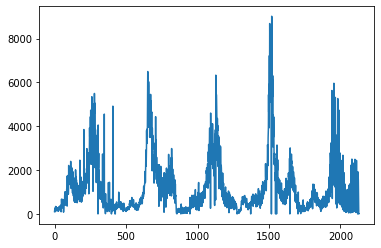

In [49]:
plt.plot(dat.cases)

In [50]:
dat=dat[['sub_region_1','retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline',	'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline',	'residential_percent_change_from_baseline',	'cases']]

In [51]:

#Split into features and target (Price)
X = dat.drop(['cases'], axis = 1)
y = dat['cases']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)


Comparison

In [15]:
# define the model
#Experiment with deeper and wider networks
model = Sequential()
model.add(Dense(128, input_dim=6, activation='relu'))
model.add(Dense(64, activation='relu'))
#Output layer
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               896       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,217
Trainable params: 9,217
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(X_train.drop(['sub_region_1'], axis = 1), y_train, validation_split=0.2, epochs =50)

Epoch 1/50
43/43 [==============================] - 1s 7ms/step - loss: 2895600.5000 - mean_absolute_error: 1134.0469 - val_loss: 2276926.7500 - val_mean_absolute_error: 971.5068
Epoch 2/50
43/43 [==============================] - 0s 3ms/step - loss: 2305769.7500 - mean_absolute_error: 961.7367 - val_loss: 1716865.7500 - val_mean_absolute_error: 871.6872
Epoch 3/50
43/43 [==============================] - 0s 3ms/step - loss: 1779245.2500 - mean_absolute_error: 905.0475 - val_loss: 1520131.7500 - val_mean_absolute_error: 816.3729
Epoch 4/50
43/43 [==============================] - 0s 3ms/step - loss: 1677903.2500 - mean_absolute_error: 886.5549 - val_loss: 1500462.5000 - val_mean_absolute_error: 802.3555
Epoch 5/50
43/43 [==============================] - 0s 3ms/step - loss: 1658359.1250 - mean_absolute_error: 880.9202 - val_loss: 1479121.2500 - val_mean_absolute_error: 790.7032
Epoch 6/50
43/43 [==============================] - 0s 3ms/step - loss: 1649493.6250 - mean_absolute_error: 8

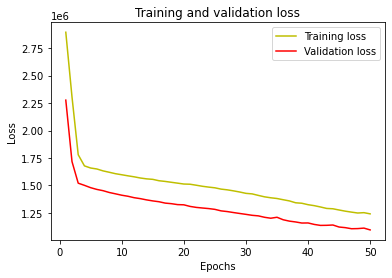

In [17]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

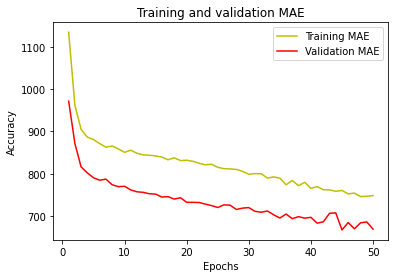

In [18]:

acc = history.history['mean_absolute_error']
val_acc = history.history['val_mean_absolute_error']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:

#Comparison with other models..
#Neural network - from the current code
mse_neural, mae_neural = model.evaluate(X_test.drop(['sub_region_1'], axis = 1), y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)

14/14 [==============================] - 0s 2ms/step - loss: 1321951.7500 - mean_absolute_error: 759.4526
Mean squared error from neural net:  1321951.75
Mean absolute error from neural net:  759.45263671875


In [20]:
yact=list(y_test)


In [21]:
y_forecast=model.predict(X_test.drop(['sub_region_1'], axis = 1))
y_pred=[]
for i in range(len(y_forecast)):
  y_pred.append(y_forecast[i][0])

In [25]:
for i in range(len(yact)):
  if yact[i]<=0:
    yact[i]=1
    
for i in range(len(y_forecast)):
  if y_pred[i]<=0:
    y_pred[i]=1

mean_absolute_percentage_error(yact, y_pred)

17.91155926109528

Text(0.5, 1.0, 'RNN')

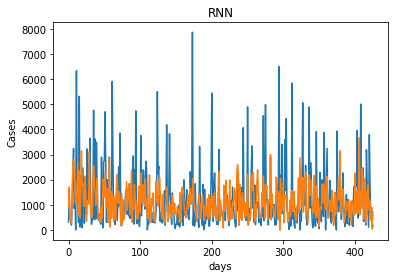

In [26]:
plt.plot(yact)
plt.plot(y_pred)
plt.xlabel('days')
plt.ylabel('Cases')
plt.title('RNN')

In [53]:
#Linear regression
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error

### Linear regression
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train.drop(['sub_region_1'], axis = 1), y_train)
y_pred_lr = lr_model.predict(X_test.drop(['sub_region_1'], axis = 1))
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean squared error from linear regression: ', mse_lr)
print('Mean absolute error from linear regression: ', mae_lr)


Mean squared error from linear regression:  1332557.614207099
Mean absolute error from linear regression:  830.4372949552921


In [54]:
yact=list(y_test)
yforelr=list(y_pred_lr)

for i in range(len(yact)):
  if yact[i]<=0:
    yact[i]=1
    
for i in range(len(yforelr)):
  if yforelr[i]<=0:
    yforelr[i]=1

mean_absolute_percentage_error(yact, yforelr)

9.455870900099418

In [55]:
yact=list(y_test)
ypred=list(y_pred_lr)
#del yact[16]
#del ypred[16]

Text(0.5, 1.0, 'Multiple linear regression')

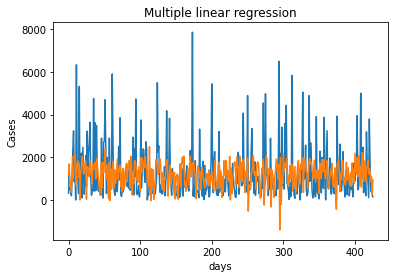

In [56]:
plt.plot(yact)
plt.plot(ypred)
plt.xlabel('days')
plt.ylabel('Cases')
plt.title('Multiple linear regression')

In [88]:
### Decision tree
tree =  DecisionTreeRegressor(random_state = 1) 
tree.fit(X_train.drop(['sub_region_1'], axis = 1), y_train)
y_pred_tree = tree.predict(X_test.drop(['sub_region_1'], axis = 1))
mse_dt = mean_squared_error(y_test, y_pred_tree)
mae_dt = mean_absolute_error(y_test, y_pred_tree)
print('Mean squared error using decision tree: ', mse_dt)
print('Mean absolute error using decision tree: ', mae_dt)

Mean squared error using decision tree:  1962851.4460093896
Mean absolute error using decision tree:  813.5023474178404


In [89]:
yact=list(y_test)
yforedt=list(y_pred_tree)

for i in range(len(yact)):
  if yact[i]<=0:
    yact[i]=1
    
for i in range(len(yforedt)):
  if yforedt[i]<=0:
    yforedt[i]=1

mean_absolute_percentage_error(yact, yforedt)

14.207749315442884

In [69]:
yact=list(y_test)
ypred=list(y_pred_tree)
#del yact[16]
#del ypred[16]

Text(0.5, 1.0, 'Decision Tree')

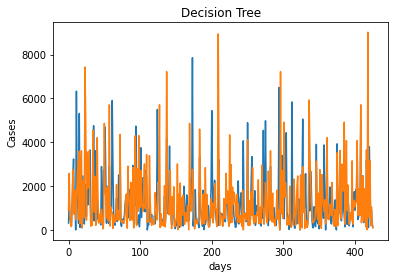

In [70]:
plt.plot(yact)
plt.plot(ypred)

plt.xlabel('days')
plt.ylabel('Cases')
plt.title('Decision Tree')

In [61]:
#Random forest.
#Increase number of tress and see the effect
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 6, random_state=30)
model.fit(X_train.drop(['sub_region_1'], axis = 1), y_train)

y_pred_RF = model.predict(X_test.drop(['sub_region_1'], axis = 1))

mse_RF = mean_squared_error(y_test, y_pred_RF)
mae_RF = mean_absolute_error(y_test, y_pred_RF)
print('Mean squared error using Random Forest: ', mse_RF)
print('Mean absolute error Using Random Forest: ', mae_RF)


Mean squared error using Random Forest:  1140475.0736828377
Mean absolute error Using Random Forest:  665.5586854460093


In [63]:
yact=list(y_test)
yforerf=list(y_pred_RF)

for i in range(len(yact)):
  if yact[i]<=0:
    yact[i]=1
    
for i in range(len(yforerf)):
  if yforerf[i]<=0:
    yforerf[i]=1

mean_absolute_percentage_error(yact, yforerf)

11.267474937764554

Text(0.5, 1.0, 'Random Forest')

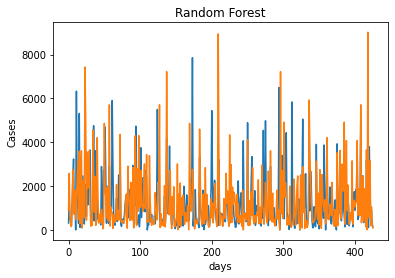

In [64]:
plt.plot(yact)
plt.plot(ypred)
plt.xlabel('days')
plt.ylabel('Cases')
plt.title('Random Forest')

In [ ]:
#error measure might slightly change based on random state

In [ ]:
Fed multitask
mse: 1024622.2064333151
mae: 755.0113826619515
mape: 4.396195393083973


neural net
mse:  1324576.25
mae: 785.7551879882812
mape: 15.118008771454143


LR:
mse:  1332557.614207099
mae:  830.4372949552921
mape: 9.455870900099418

decision tree:
mse:  2087884.5093896713
mae:  843.8849765258216
mape: 9.457815976942191


random forest:
mse:1515941.977112676
mae:  752.1983568075117
mape:9.567018447095762


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
models=['Federated Multitask','Neural Net','Linear Regression','Decision Tree','Random Forest']
mse=[1024622.2064333151,1324576.25,1332557.614207099,2087884.5093896713,1515941.977112676]
mae=[755.0113826619515,785.7551879882812,830.4372949552921,843.8849765258216,752.1983568075117]
mape=[4.396195393083973, 15.118008771454143,9.455870900099418,9.457815976942191,9.567018447095762]

df = pd.DataFrame(list(zip(models,np.round(mape,2),np.round(mae,2),np.round(mse,2))),
               columns =['Models', 'MAPE','MAE','MSE'])

df

In [ ]:
import matplotlib.style as style
style.available

style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

In [ ]:
import matplotlib
import seaborn as sns


In [ ]:
matplotlib.rcParams['font.family'] = "serif"


In [ ]:
[f.name for f in matplotlib.font_manager.fontManager.afmlist]


['Helvetica',
 'ITC Bookman',
 'Times',
 'Courier',
 'Computer Modern',
 'Palatino',
 'Courier',
 'Helvetica',
 'Courier',
 'Times',
 'Helvetica',
 'Utopia',
 'Times',
 'Computer Modern',
 'ITC Bookman',
 'Courier',
 'Times',
 'Helvetica',
 'ITC Avant Garde Gothic',
 'Palatino',
 'New Century Schoolbook',
 'ITC Avant Garde Gothic',
 'Utopia',
 'Helvetica',
 'ITC Bookman',
 'Times',
 'Times',
 'Palatino',
 'Courier',
 'Helvetica',
 'Courier',
 'Helvetica',
 'Computer Modern',
 'Helvetica',
 'Helvetica',
 'New Century Schoolbook',
 'ITC Avant Garde Gothic',
 'Courier',
 'Helvetica',
 'Symbol',
 'Helvetica',
 'ITC Bookman',
 'New Century Schoolbook',
 'Computer Modern',
 'Symbol',
 'ITC Zapf Chancery',
 'Computer Modern',
 'Times',
 'Helvetica',
 'Times',
 'Helvetica',
 'Courier',
 'Utopia',
 'Palatino',
 'ZapfDingbats',
 'ITC Zapf Dingbats',
 'Utopia',
 'Helvetica',
 'New Century Schoolbook',
 'ITC Avant Garde Gothic']

In [ ]:
sns.set_context('poster')  #Everything is larger
sns.set_context('paper')  #Everything is smaller
sns.set_context('talk')  #Everything is sized for a presentation

In [ ]:
style.use('seaborn-talk') #sets the size of the charts
style.use('ggplot')

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
models=['Federated Multitask','Neural Net','Linear Regression','Decision Tree','Random Forest']
mse=[1024622.2064333151,1324576.25,1332557.614207099,2087884.5093896713,1515941.977112676]
mae=[755.0113826619515,785.7551879882812,830.4372949552921,843.8849765258216,752.1983568075117]
mape=[4.396195393083973, 15.118008771454143,9.455870900099418,9.457815976942191,9.567018447095762]



Text(0.5, 1.0, 'MSE Comparison for Models')

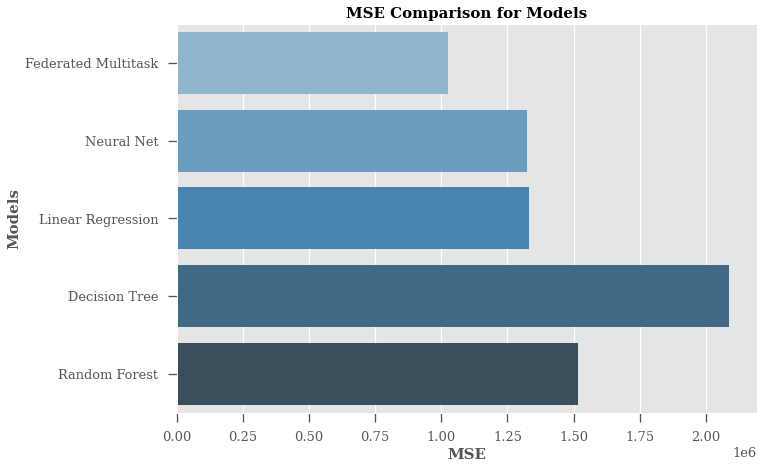

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.barplot(y=models , x = mse,  palette=("Blues_d"),orient="h")
sns.set_context('paper')  #Everything is smaller
plt.xlabel('MSE', weight = 'bold',fontsize = 15)
plt.ylabel('Models',weight = 'bold',fontsize = 15)
plt.title('MSE Comparison for Models', weight = 'bold',fontsize = 15)

In [ ]:
for i in range(len(mae)):
  mae[i]=mae[i]/100

Text(0.5, 1.0, 'MAE Comparison for Models')

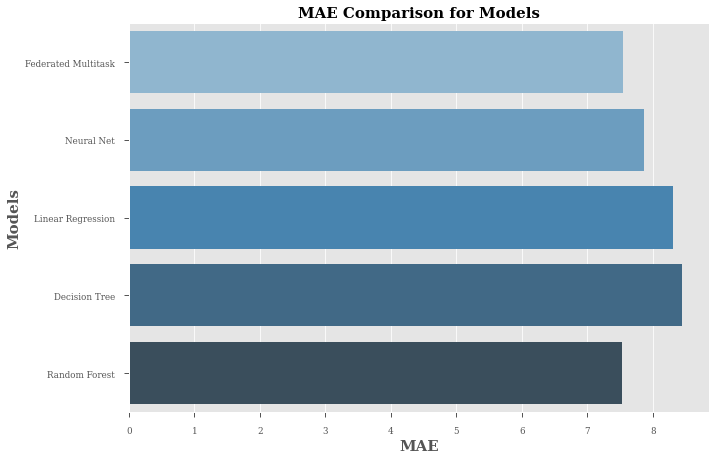

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.barplot(y=models , x = mae,  palette=("Blues_d"),orient="h")
sns.set_context('paper')  #Everything is smaller
plt.xlabel('MAE', weight = 'bold',fontsize = 15)
plt.ylabel('Models',weight = 'bold',fontsize = 15)
plt.title('MAE Comparison for Models', weight = 'bold',fontsize = 15)



Text(0.5, 1.0, 'MAPE Comparison for Models')

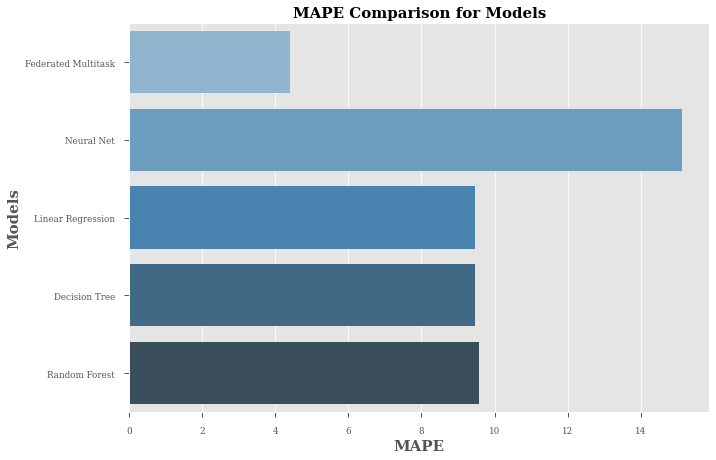

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.barplot(y=models , x = mape,  palette=("Blues_d"),orient="h")
sns.set_context('paper')  #Everything is smaller
plt.xlabel('MAPE', weight = 'bold',fontsize = 15)
plt.ylabel('Models',weight = 'bold',fontsize = 15)
plt.title('MAPE Comparison for Models', weight = 'bold',fontsize = 15)